<a href="https://colab.research.google.com/github/Gladybams/Projet_conversion-/blob/master/Projet_ConversionRate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## On importe les librairies usuelles

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

On importe notre dataset qu'on nomme ici "conversion"

In [0]:
conversion = pd.read_csv('conversion_data.csv')
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


On verifie s'il y a des valeurs manquantes dans notre tableau 

In [0]:
conversion.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

On verifie l'équivalence entre le nombre de conversion et non conversion

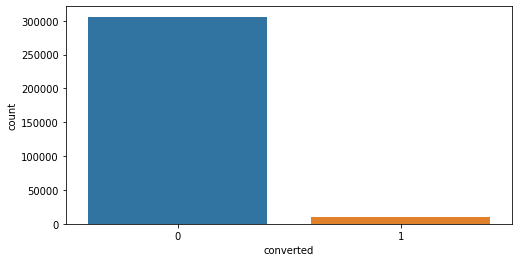

In [0]:
plt.figure(figsize=(8,4))
sns.countplot(x='converted', data=conversion)

In [0]:
conversion.converted.value_counts()

0    306000
1     10200
Name: converted, dtype: int64

Dummyfication des villes (On Converti les variables catégoriques en variables factices)

In [0]:
dataset= pd.get_dummies(conversion, drop_first=True) 

Séparation des variables

In [0]:
X = dataset.loc[:, dataset.columns != "converted"]
y = dataset.loc[:, dataset.columns == "converted"]

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

On normalise pour aider l'algorithme à faire ses prédictions

In [0]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

#### Modele de regression Logistique 

In [0]:
# Modele de regression Logistique 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, class_weight="balanced")
print("train set de la regression logistique")
print()
classifier.fit(X_train, y_train)

train set de la regression logistique



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
print("Le score de performance du modèle sur l’échantillon d’apprentissage  (X_train , y_train) :")
classifier_score = classifier.score(X_train,y_train)
print()
print("Score Classifier : {}  ".format(classifier_score)) 


Le score de performance du modèle sur l’échantillon d’apprentissage  (X_train , y_train) :

Score Classifier : 0.9421370967741935  


In [0]:
print("Le score de performance de ces trois modèles sur l’échantillon d’apprentissage  (X_test , y_test) :")
classifier_score = classifier.score(X_test,y_test)
print()
print("Score Classifier : {}  ".format(classifier_score)) 

Le score de performance de ces trois modèles sur l’échantillon d’apprentissage  (X_test , y_test) :

Score Classifier : 0.9415717900063251  


On rémarque que le score ne varie presque pas.

In [0]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

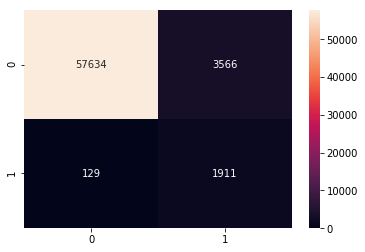

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")

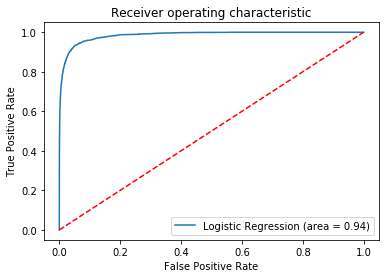

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## RECOMMENDATIONS

Pour optimiser les taux de conversion nous devons tester quelques modifications sur le meme site grace à l'A/B test enfin de comparer les taux de conversions de deux versions.